In [ ]:
import pandas as pd
import numpy as np
import os, shutil

In [ ]:
base_dir = '//home/gabriel/Desktop/msds696'
train_dir = os.path.join(base_dir, 'train')

In [ ]:
df_train_path =os.path.join(base_dir, 'train_FD001.txt')
df_test_path = os.path.join(base_dir, 'test_FD001.txt')

In [ ]:
df_train = pd.read_csv(df_train_path,sep=" ", header=None)
df_test = pd.read_csv(df_test_path,sep=" ", header=None)
columnnames=['unit number', 'time, in cycles', 'os1', 'os2', 'os3']
for i in range (23):
  columnnames.append(str(i))
df_train.columns= columnnames


data prep is almost the same as in the image nn notebook. 
in this note book I am keeping all the data in one dataframe. 
each unit number will be give one row in the dataframe. 

In [ ]:
columnnames=['unit number', 'time, in cycles', 'os1', 'os2', 'os3']
for i in range (23):
  columnnames.append(str(i))
df_test.columns= columnnames

In [ ]:
df_train = df_train.drop(columns=["21","22"])

In [ ]:
df_test = df_test.drop(columns=["21","22"])

In [ ]:
unique_values_unit_number_train = df_train['unit number'].unique()

In [ ]:
unique_values_unit_number_test = df_test['unit number'].unique()

In [ ]:
EOL_train=[]
for i in df_train['unit number']:
        EOL_train.append( ((df_train[df_train['unit number'] == i]["time, in cycles"]).values)[-1])

df_train["EOL"]=EOL_train

# Calculate "LR"
df_train["LR"] = df_train["time, in cycles"].div(df_train["EOL"])

df_train['label'] = pd.cut(df_train['LR'], bins=[0, 0.6, 0.8, np.inf], labels=[0, 1, 2], right=False)

#df_path.drop(columns=['unit number', 'EOL', 'LR'], inplace=True)


df_train.head()

,unit number,"time, in cycles",os1,os2,os3,0,1,2,3,4,...,14,15,16,17,18,19,20,EOL,LR,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042,0


In [ ]:
EOL_test=[]
for i in df_test['unit number']:
        EOL_test.append( ((df_test[df_test['unit number'] == i]["time, in cycles"]).values)[-1])

df_test["EOL"]=EOL_test

# Calculate "LR"
df_test["LR"] = df_test["time, in cycles"].div(df_test["EOL"])

df_test['label'] = pd.cut(df_test['LR'], bins=[0, 0.6, 0.8, np.inf], labels=[0, 1, 2], right=False)

#df_path.drop(columns=['unit number', 'EOL', 'LR'], inplace=True)


df_test.head()

,unit number,"time, in cycles",os1,os2,os3,0,1,2,3,4,...,14,15,16,17,18,19,20,EOL,LR,label
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,0.032258,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,0.064516,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,0.096774,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,0.129032,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,0.161290,0


In [ ]:
df_train['label'] = df_train.label.cat.codes
df_test['label'] = df_test.label.cat.codes

In [ ]:
columns_to_exclude = ['unit number','EOL','label', 'LR','os3','0','4','9','17','18','15']

# Create a new DataFrame with only the columns you want to scale
df_train_subset = df_train.drop(columns=columns_to_exclude)
for column_name in df_train_subset.columns:
    df_train[column_name] = (df_train[column_name] - df_train[column_name].min()) / (df_train[column_name].max() - df_train[column_name].min())

In [ ]:
columns_to_exclude = ['unit number','EOL','label', 'LR','os3','0','4','9','17','18','15']

# Create a new DataFrame with only the columns you want to scale
df_test_subset = df_test.drop(columns=columns_to_exclude)
for column_name in df_test_subset.columns:
    df_test[column_name] = (df_test[column_name] - df_test[column_name].min()) / (df_test[column_name].max() - df_test[column_name].min())

In [ ]:
df_train_list = []
for i in unique_values_unit_number_train:
    df_i = df_train[df_train['unit number'] == i]
    df_train_list.append(df_i)

In [ ]:
df_test_list = []
for j in unique_values_unit_number_test:
    df_j = df_test[df_test['unit number'] == j]
    df_test_list.append(df_j)

In [ ]:
zero_list_train = []
one_list_train = []
two_list_train =[]

zero_list_test = []
one_list_test = []
two_list_test =[]

In [ ]:
for i in df_train_list:

    get_lable = i[i['label'] == 0]
    in_use_df = get_lable.drop(['EOL', 'LR','label','unit number'], axis=1)
    flattened_df = pd.DataFrame([in_use_df.to_numpy().flatten()])
    flattened_df ['label'] = 0
    zero_list_train.append(flattened_df)

In [ ]:
for i in df_train_list:
    get_lable = i[i['label'] == 2]
    in_use_df = get_lable.drop(['EOL', 'LR','label','unit number'], axis=1)
    flattened_df = pd.DataFrame([in_use_df.to_numpy().flatten()])
    flattened_df ['label'] = 2
    two_list_train.append(flattened_df)

In [ ]:
for i in df_train_list:
    get_lable = i[i['label'] == 1]
    in_use_df = get_lable.drop(['EOL', 'LR','label','unit number'], axis=1)
    flattened_df = pd.DataFrame([in_use_df.to_numpy().flatten()])
    flattened_df ['label'] = 1
    one_list_train.append(flattened_df)

In [ ]:
list_of_lists = [zero_list_train,one_list_train,two_list_train]

In [ ]:
for i in df_test_list:

    get_lable = i[i['label'] == 0]
    in_use_df = get_lable.drop(['EOL', 'LR','label','unit number'], axis=1)
    flattened_df = pd.DataFrame([in_use_df.to_numpy().flatten()])
    flattened_df ['label'] = 0
    zero_list_test.append(flattened_df)

In [ ]:
for i in df_test_list:
    get_lable = i[i['label'] == 2]
    in_use_df = get_lable.drop(['EOL', 'LR','label','unit number'], axis=1)
    flattened_df = pd.DataFrame([in_use_df.to_numpy().flatten()])
    flattened_df ['label'] = 2
    two_list_test.append(flattened_df)

In [ ]:
for i in df_test_list:
    get_lable = i[i['label'] == 1]
    in_use_df = get_lable.drop(['EOL', 'LR','label','unit number'], axis=1)
    flattened_df = pd.DataFrame([in_use_df.to_numpy().flatten()])
    flattened_df ['label'] = 1
    one_list_test.append(flattened_df)

In [ ]:
list_of_lists_test = [zero_list_test,one_list_test,two_list_test]

In [ ]:
combined_df = pd.concat([df for sublist in list_of_lists for df in sublist])

In [ ]:
combined_df_test = pd.concat([df for sublist in list_of_lists_test for df in sublist]).fillna(-1)
combined_df_test .head()

,0,1,2,3,4,5,6,7,8,9,...,4515,4516,4517,4518,4519,4520,4521,4522,4523,4524
0,0.0,0.65625,0.692308,100.0,518.67,0.596215,0.421968,0.282214,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,0.0,0.45625,0.769231,100.0,518.67,0.482650,0.526097,0.464979,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,0.0,0.50625,0.538462,100.0,518.67,0.283912,0.542197,0.490096,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,0.0,0.36250,0.461538,100.0,518.67,0.473186,0.529473,0.317337,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,0.0,0.66250,0.153846,100.0,518.67,0.410095,0.564788,0.360016,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [ ]:
# 5427 is the len of the unit with the most turbomachine run time. I have to make all the rows equal that len to push through the nn
for col_num in range(4527, 5427):
    col_name = f'col{col_num}'
    combined_df_test[col_name] = -1

/tmp/ipykernel_81592/634798689.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df_test[col_name] = -1
/tmp/ipykernel_81592/634798689.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df_test[col_name] = -1
/tmp/ipykernel_81592/634798689.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fram

In [ ]:
print((combined_df['label'].value_counts()))

label
0    100
1    100
2    100
Name: count, dtype: int64


In [ ]:
print((combined_df_test['label'].value_counts()))

label
0    100
1    100
2    100
Name: count, dtype: int64


data augmentation :

In [ ]:
# repeating all values 30 times 
df_new = pd.DataFrame(np.repeat(combined_df.values, 30, axis=0), columns=combined_df.columns)

print((df_new['label'].value_counts()))



label
0.0    3000
1.0    3000
2.0    3000
Name: count, dtype: int64


In [ ]:
#changing all values by adding very small random values 
import random

df_new = df_new.apply(lambda x: x + random.randint(13, 2300) / 1e18 if x.name != 'label' else x)


In [ ]:
print((df_new['label'].value_counts()))

label
0.0    3000
1.0    3000
2.0    3000
Name: count, dtype: int64


In [ ]:
master = pd.concat([combined_df,df_new ]).fillna(-1)

In [ ]:
print((master['label'].value_counts()))

label
0.0    3100
1.0    3100
2.0    3100
Name: count, dtype: int64


In [ ]:
master.head()

,0,1,2,3,4,5,6,7,8,9,...,5415,5416,5417,5418,5419,5420,5421,5422,5423,5424
0,0.0,0.459770,0.166667,100.0,518.67,0.183735,0.406802,0.309757,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,0.0,0.396552,1.000000,100.0,518.67,0.204819,0.279049,0.152431,14.62,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,0.0,0.545977,0.916667,100.0,518.67,0.250000,0.286898,0.268062,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,0.0,0.643678,0.916667,100.0,518.67,0.418675,0.313059,0.347738,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,0.0,0.678161,0.666667,100.0,518.67,0.168675,0.273599,0.219615,14.62,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


build models

In [ ]:
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras import backend, models, layers, optimizers, regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

2024-08-16 11:27:19.178021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 11:27:19.185386: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 11:27:19.187585: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-16 11:27:19.194289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-16 11:27:19.751952: W tensorflow/compiler/tf2

In [ ]:




# Extract features and labels
X = master.drop('label', axis=1)  # Replace 'label' with your actual label column name
y = master['label']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert labels to categorical
num_classes = len(y.unique())
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)



In [ ]:
def build_model_reg():
    backend.clear_session()
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))),
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(64, activation='relu')),
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))



    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model



In [ ]:
model = build_model_reg()

/home/gabriel/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-16 11:27:20.601953: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-08-16 11:27:20.601974: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: gabriel-desktop
2024-08-16 11:27:20.601979: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: gabriel-desktop
2024-08-16 11:27:20.602053: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.90.7
2024-08-16 11:27:

Epoch 1/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6460 - loss: 0.6719 - val_accuracy: 0.6694 - val_loss: 0.4678
Epoch 2/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6717 - loss: 0.5075 - val_accuracy: 0.6694 - val_loss: 0.4674
Epoch 3/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6883 - loss: 0.4740 - val_accuracy: 0.6694 - val_loss: 0.6031
Epoch 4/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6954 - loss: 0.4658 - val_accuracy: 0.6922 - val_loss: 0.4581
Epoch 5/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7177 - loss: 0.4597 - val_accuracy: 0.6694 - val_loss: 0.4688
Epoch 6/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7086 - loss: 0.4552 - val_accuracy: 0.6694 - val_loss: 0.4964
Epoch 7/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7324 - loss: 0.4448 - val_accuracy: 0.7446 - val_loss: 0.4552
Epoch 8/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7161 - loss: 0.4569 - val_accu

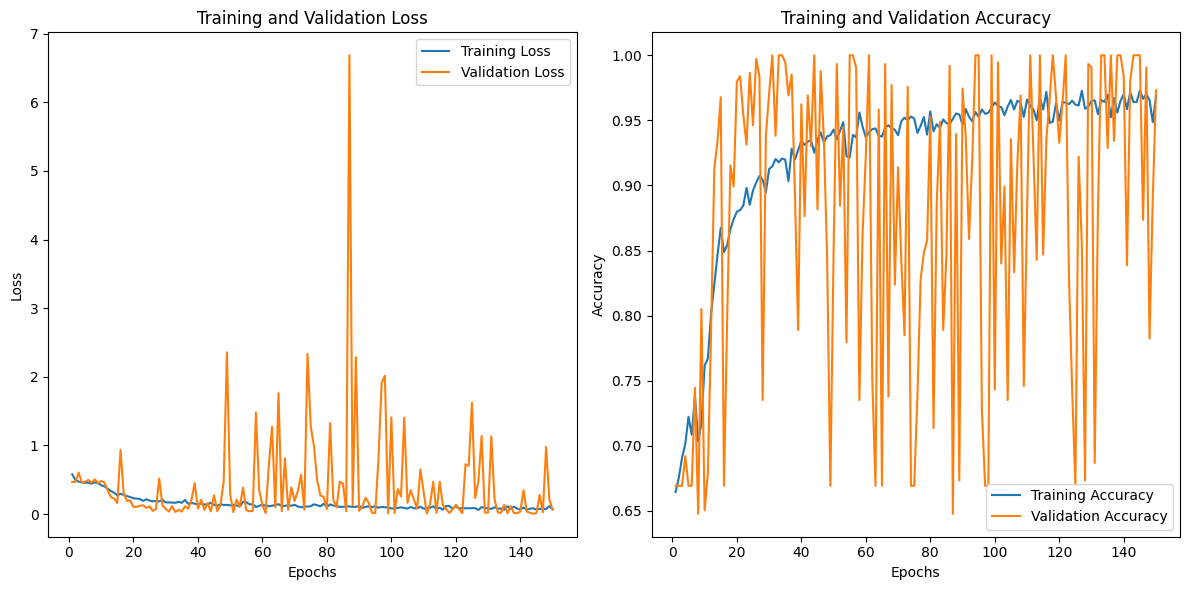

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Train the model (assuming you've already defined and compiled your model)
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1)

# Extract training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot training and validation loss
ax1.plot(np.arange(1, len(train_loss) + 1), train_loss, label='Training Loss')
ax1.plot(np.arange(1, len(val_loss) + 1), val_loss, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(np.arange(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
ax2.plot(np.arange(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9734 - loss: 0.0636

Test accuracy: 0.9720430374145508


In [ ]:




# Extract features and labels
X_main = combined_df_test.drop('label', axis=1)  # Replace 'label' with your actual label column name
y_main = combined_df_test['label']

# Convert labels to categorical
num_classes = len(y_main .unique())
y_main = tf.keras.utils.to_categorical(y_main , num_classes=num_classes)

test_loss, test_acc = model.evaluate(X_main, y_main )
print('\nTest accuracy:', test_acc)



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.5774 - loss: 880.3460

Test accuracy: 0.49000000953674316
